In [31]:
%matplotlib inline
import random
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

An ensemble of randomly generated points does not possess a natural cluster-like structure. To make things slightly more tricky, we want to modify the function that generates our initial data points to output a more interesting structure. The following routine constructs a specified number of Gaussian distributed clusters with random variances:

In [32]:
def init_board_gauss(N, k):
    n = float(N)/k
    X = []
    for i in range(k):
        c = (random.uniform(-1, 1), random.uniform(-1, 1))
        s = random.uniform(0.05,0.5)
        x = []
        while len(x) < n:
            a, b = np.array([np.random.normal(c[0], s), np.random.normal(c[1], s)])
            # Continue drawing points from the distribution in the range [-1,1]
            if abs(a) < 1 and abs(b) < 1:
                x.append([a,b])
        X.extend(x)
    X = np.array(X)[:N]
    return X

In [76]:
X = init_board_gauss(10,9)

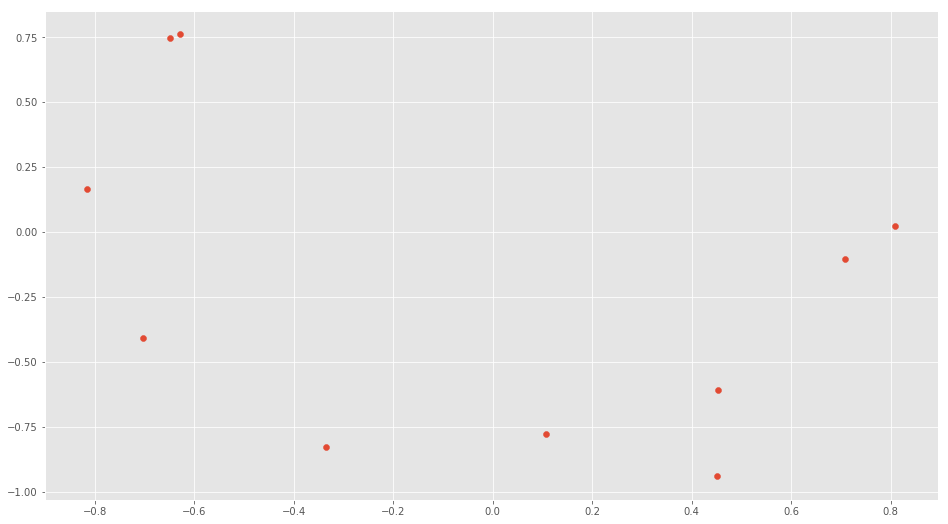

In [77]:
x, y = X.T
plt.scatter(x, y)

In [78]:
# Euclidean Distance Calculator
def dist(a, b):
    return np.linalg.norm(a - b)

In [164]:
def kmeans(k, epsilon=0):
    num_instances, num_features = X.shape
    
    # Coordinates of random centroids
    c1 = X[np.random.randint(0, num_instances - 1)]
    c2 = X[np.random.randint(0, num_instances - 1)]
    prototypes = np.array(list(zip(c1, c2)), dtype=np.float32)
    
    # To update centroids' value
    prototypes_old = np.zeros(prototypes.shape)
    
    # Clusters
    belongs_to = np.zeros((num_instances, 1))
    
    # Calculate distance between old and new (error function)
    error = dist(prototypes, prototypes_old)
    
    # Keep track of iterations' number
    iteration = 0
    
    # Do until a certain value (epsilon is 0 in this case)
    while error > epsilon:
        iteration += 1
        
        # for each instance in the dataset
        for index_instance, instance in enumerate(X):
            # Define a distance vector of size k
            dist_vec = np.zeros((k,1))
            # For each centroid
            for index_prototype, prototype in enumerate(prototypes):
                # Compute the distance between x and centroid
                dist_vec[index_prototype] = dist(prototype, instance)
            # Find the smallest distance, assign that distance to a cluster
            belongs_to[index_instance, 0] = np.argmin(dist_vec)
        
        prototypes_old = deepcopy(prototypes)
        
        # Calculate the average of cluster 1 points and cluster ...k points separately and that will be our new centroids.
        for i in range(k):
            points = [X[j] for j in range(len(X)) if belongs_to[j] == i]
            prototypes[i] = np.mean(points, axis=0)
           
        #Update error
        error = dist(prototypes, prototypes_old)
        
    return prototypes, belongs_to, iteration

N° of iterations: 2


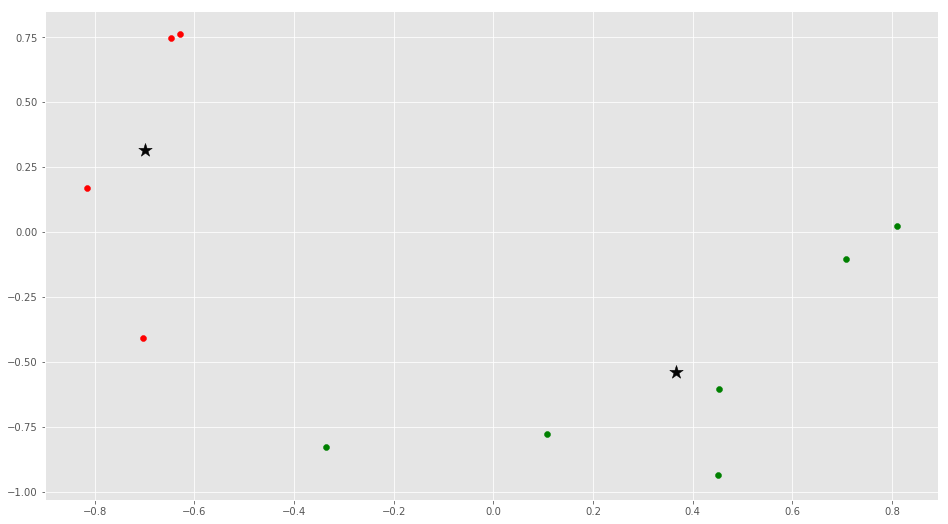

In [167]:
# Number of clusters
k = 2
prototypes, belongs_to, iterations = kmeans(k)

print("N° of iterations: " + str(iterations))

# Plotting
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if belongs_to[j] == i])
        ax.scatter(points[:, 0], points[:, 1], c=colors[i])
ax.scatter(prototypes[:, 0], prototypes[:, 1], marker='*', s=200, c='#050505')